In [1]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Apply one-hot encoder
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create feature dataset, X
X = insurance_one_hot.drop("charges", axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [5]:
# Create label dataset, y
y = insurance_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
# Create training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [7]:
# Create NN model
tf.random.set_seed(42)
insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [8]:
# Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [9]:
# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 8532.1523 - mae: 8532.1523
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7879.3213 - mae: 7879.3213
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7569.2134 - mae: 7569.2134
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7702.1099 - mae: 7702.1099
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7690.9106 - mae: 7690.9106
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7605.3511 - mae: 7605.3511
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 7582.5723 - mae: 7582.5723
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7760.2466 - mae: 7760.2466
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7506.0454 - mae: 7506.0454
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7705.1509 - mae: 7705.1509

In [10]:
# Check the results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 8253.6182 - mae: 8253.6182


[8253.6181640625, 8253.6181640625]

## Improving the model performance

In [11]:
# Adding extra layer and use Adam optimiser
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13291.2637 - mae: 13291.2637
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13144.9170 - mae: 13144.9170
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12826.5518 - mae: 12826.5518
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12188.8203 - mae: 12188.8203
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 11102.5107 - mae: 11102.5107
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9665.4111 - mae: 9665.4111
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 8291.4854 - mae: 8291.4854
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7567.9712 - mae: 7567.9712
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7432.2915 - mae: 7432.2915
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7410.8838 - mae:

In [12]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 4930.8540 - mae: 4930.8540


[4930.85400390625, 4930.85400390625]

In [13]:
# Train for longer
insurance_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 6ms/step - loss: 13302.1221 - mae: 13302.1221
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 13136.5254 - mae: 13136.5254
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12786.0107 - mae: 12786.0107
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 12096.9766 - mae: 12096.9766
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 10948.1152 - mae: 10948.1152
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 9494.1475 - mae: 9494.1475
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 8172.5757 - mae: 8172.5757
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 7546.2549 - mae: 7546.2549
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7443.8916 - mae: 7443.8916
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 7423.0503 - mae:

In [14]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3497.7236 - mae: 3497.7236


[3497.7236328125, 3497.7236328125]

Text(0.5, 0, 'epochs')

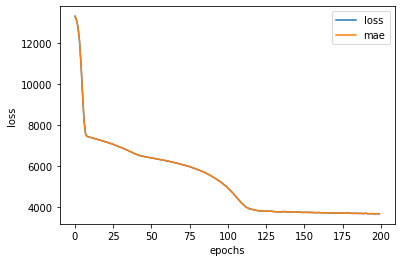

In [15]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [16]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

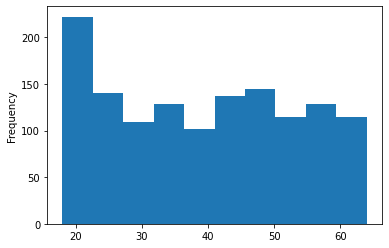

In [17]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

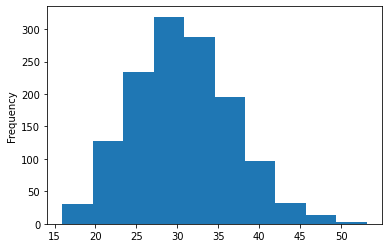

In [18]:
X["bmi"].plot(kind="hist")

In [19]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Pre-processing the data

In [23]:
insurance_2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance_2.drop("charges", axis=1)
y = insurance_2["charges"]

# Build our train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(X_train)

# Normalise and one-hot-encode both training and testing data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [25]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [26]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])